Ways to adjust hyperparameters:
    1. Manual Tuning
    2. Randomly With RandomSearchCV
    3. Exhaustively with GridSearchCV

In [1]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt

In [2]:
heart_disease=pd.read_csv('../zero-to-mastery-ml/data/heart-disease.csv')
heart_disease.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
X=heart_disease.drop('target',axis=1)
Y=heart_disease.target
X.head(5),Y.head(5)

(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   63    1   3       145   233    1        0      150      0      2.3      0   
 1   37    1   2       130   250    0        1      187      0      3.5      0   
 2   41    0   1       130   204    0        0      172      0      1.4      2   
 3   56    1   1       120   236    0        1      178      0      0.8      2   
 4   57    0   0       120   354    0        1      163      1      0.6      2   
 
    ca  thal  
 0   0     1  
 1   0     2  
 2   0     2  
 3   0     2  
 4   0     2  ,
 0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline
np.random.seed(42)

In [5]:
'''
clf=RandomForestClassifier()
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)

clf.fit(x_train,y_train)
clf.score(x_test,y_test)

clf.get_params()'''

'\nclf=RandomForestClassifier()\nx_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)\n\nclf.fit(x_train,y_train)\nclf.score(x_test,y_test)\n\nclf.get_params()'

We are adjusting:
* `max_depth`
* `min_samples_leaf`
* `min_samples_split`
* `max_features`
* `n_estimators`

In [6]:
from sklearn.metrics import recall_score,accuracy_score,f1_score,precision_score

def evaluate_preds(y_true,y_preds):
    '''
    Evaluation comparision on a classification model
    '''
    accuracy=accuracy_score(y_true,y_preds)*100
    recall=recall_score(y_true,y_preds,zero_division=False)*100
    f1=f1_score(y_true,y_preds)*100
    precision=precision_score(y_true,y_preds)*100
    print(accuracy,recall,f1,precision)
    metrics_dict={'precision':round(precision,2),
                  'f1_score':round(f1,2),
                  'recall_score':round(recall,2),
                  'accuracy':round(accuracy,2)
    }
    for i in metrics_dict.keys():
        print(metrics_dict[i])
    return metrics_dict

In [7]:
np.random.seed(6)
heart_disease_shuffled=heart_disease.sample(frac=1)

In [8]:
x=heart_disease_shuffled.drop('target',axis=1)
y=heart_disease_shuffled.target

In [9]:
def train_valid_test_split(x,y,train_split,valid_split):
    train_split=round(train_split*len(x))
    valid_split=round((train_split+valid_split)*len(x))
    train_x,train_y=x[:train_split],y[:train_split]
    valid_x,valid_y=x[train_split:valid_split],y[train_split:valid_split]
    test_x,test_y=x[valid_split:],y[valid_split:]
    return train_x,train_y,valid_x,valid_y,test_x,test_y
    

In [10]:
train_x,train_y,valid_x,valid_y,test_x,test_y=train_valid_test_split(X,Y,0.5,0.1)

In [11]:
clf=RandomForestClassifier(n_estimators=10)
clf.get_params()
valid_x.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2


In [12]:
np.unique(valid_y)

array([0, 1], dtype=int64)

In [13]:
clf.fit(train_x,train_y)
y_preds=clf.predict(valid_x)
baseline_metrics=evaluate_preds(valid_y,y_preds)
baseline_metrics

8.609271523178808 100.0 15.853658536585366 8.609271523178808
8.61
15.85
100.0
8.61


{'precision': 8.61, 'f1_score': 15.85, 'recall_score': 100.0, 'accuracy': 8.61}

In [22]:

clf2=RandomForestClassifier(n_estimators=1000)
clf2.fit(train_x,train_y)
y2_preds=clf2.predict(valid_x)
custom_model=evaluate_preds(valid_y,y2_preds)


8.609271523178808 100.0 15.853658536585366 8.609271523178808
8.61
15.85
100.0
8.61


**Randomized SearchCV**

In [15]:
#Randomized Search Cross Validation
from sklearn.model_selection import RandomizedSearchCV
grid={'n_estimators':[10,100,200,500,1000,1200],
     'max_depth':[None,5,10,20,30],
     'max_features':['auto','sqrt'],
     'min_samples_split':[2,4,6],
     'min_samples_leaf':[1,2,4]}
np.random.seed(43)
x=heart_disease_shuffled.drop('target',axis=1)
y=heart_disease_shuffled['target']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

In [16]:
#Instatniate Classifier
clf=RandomForestClassifier(n_jobs=None)
#Set up Randomized SearchCV
rs_clf=RandomizedSearchCV(estimator=clf,param_distributions=grid,n_iter=10,cv=5,verbose=2)
#Fit the RandomizedCV version of clf
rs_clf.fit(X_train,Y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   3.7s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   3.8s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   3.6s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   3.8s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   3.8s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.7s
[CV] n_estimators=1000, min_samples_split=6, min_sam

[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.8s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.8s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.8s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.7s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.7s
[CV] n_estimators=100, min_samples_split=6, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [23]:
random_searchCV=evaluate_preds(Y_test,rs_clf.predict(X_test))

83.60655737704919 86.8421052631579 86.8421052631579 86.8421052631579
86.84
86.84
86.84
83.61


In [17]:
rs_clf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [19]:
grid2={'n_estimators':[10,100,200],
     'max_depth':[None,5,10,20],
     'max_features':['auto','sqrt'],
     'min_samples_split':[2],
     'min_samples_leaf':[1,4]}

In [20]:
from sklearn.model_selection import GridSearchCV
clf3=RandomForestClassifier()
gs_clf=GridSearchCV(estimator=clf3,param_grid=grid2,cv=5,verbose=2)
gs_clf.fit(X_train,Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=None, max_features=aut

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=sqrt

[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_

[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, 

[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.8s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.8s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.7s
[CV] max_depth=20, max_features=auto, min_samples_le

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [21]:
gs_clf.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [24]:
grid_searchCV=evaluate_preds(Y_test,gs_clf.predict(X_test))

86.88524590163934 86.8421052631579 89.18918918918918 91.66666666666666
91.67
89.19
86.84
86.89


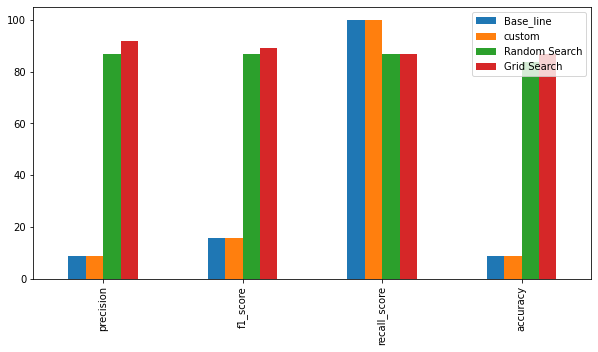

In [25]:
metrics_comparision=pd.DataFrame({'Base_line':baseline_metrics,
                                 'custom':custom_model,
                                 'Random Search':random_searchCV,
                                 'Grid Search':grid_searchCV})
metrics_comparision.plot.bar(figsize=(10,5))